### Lauren Thompson


Brief write-up

Health insurance is a contract that reqires your health insurer to pay some or all of your health care costs in exchange for a premium. The insurance company asks the individual for personal information such as location, gender, health habits, etc to gain information to determine what plan is available for purchase. 

For this project the dataset includes the age, sex, BMI, number of children, smoker, region, and charges for individuals who have health insurance. The objective of this project is to see whats variables are most likely to influence the charges. The charges variable is the target. A linear regression model will be used to predict the medical charges based on the features age, sex, BMI. children, smoker, and region.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

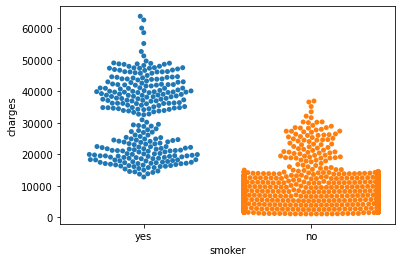

In [7]:
sns.swarmplot(x=df['smoker'],
              y=df['charges'])

For individuals who do not smoke their charges remain within the range of 0 to 15000 with a handful ranging between 15000 to 38000. For indivudals who do smoke their charges do increase significantly ranging from 12000 to 65000.

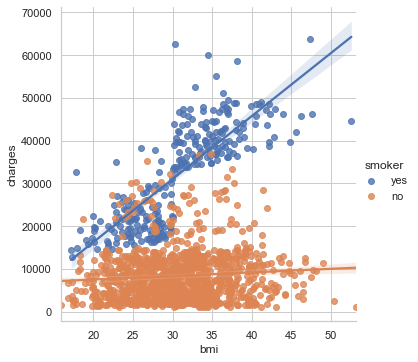

In [8]:
sns.set(style="whitegrid")
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)

For individuals who do not smoke their charges remain within the range as their BMI goes up. For indivudals who do smoke their charges do increase significantly as their BMI increase.

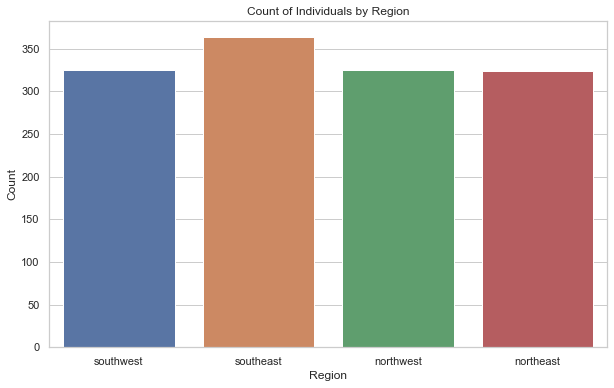

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df)
plt.title('Count of Individuals by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

The regions are mostly evenly represented with southeast showing approximately 50 more than the others.

#### Categorical variable encoding is acheived by converting the categorical variable sex, smoker, and region into numerical formats

In [10]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


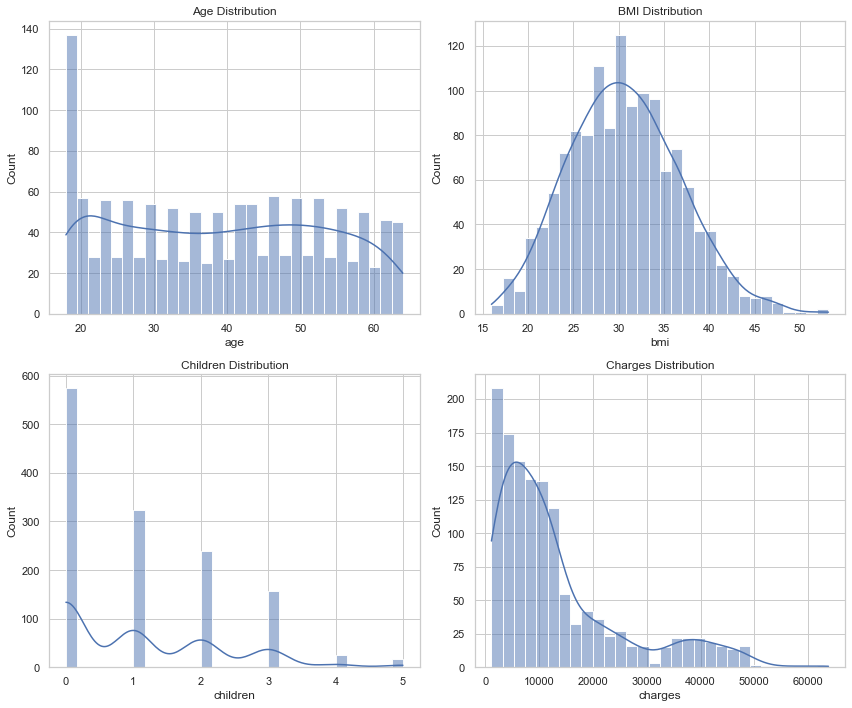

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')

sns.histplot(df['children'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Children Distribution')

sns.histplot(df['charges'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Charges Distribution')

plt.tight_layout()
plt.show()

The age distribution appears relatively uniform across different ages. the BMI distribution shows a fairly normal distribution. The children distribution is skewed towards families with fewer children. The charges distribution is highly skewed with a long tail indicating most charges are low but there are some occuring at high values as well. The overall analysis for normalization is both age and BMI are fairly distributed, the skewness and range of values of the charges may benefit from scaling to reduce the impact from the long tail. Applying a log transformation to the charges to reduce its skewness and standardize the other numerical features such as age and BMI. 

In [12]:
df_encoded['charges'] = np.log1p(df_encoded['charges'])

scaler = StandardScaler()
df_encoded[['age', 'bmi']] = scaler.fit_transform(df_encoded[['age', 'bmi']])

df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,9.734236,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,1,7.453882,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,3,8.400763,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,0,9.998137,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,0,8.260455,0,1,1,0,0,1,0,0


Visualizing the relationship between the feaetures and the target variable charges.

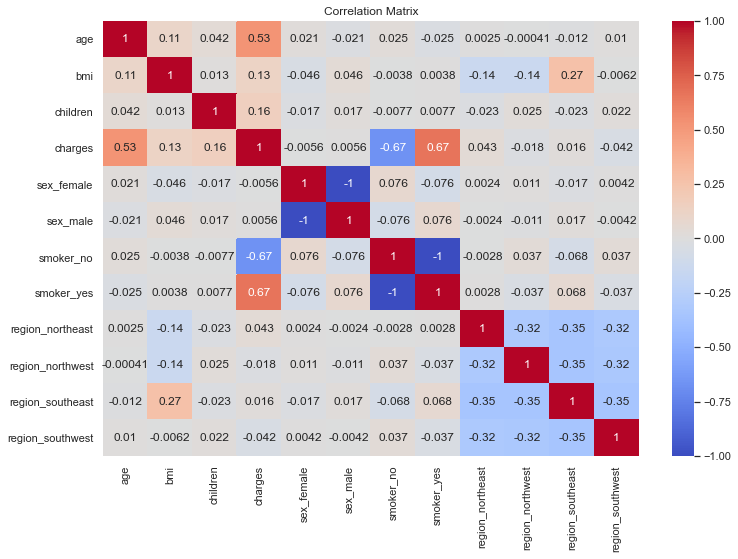

In [13]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows a strong positive correlation between smoking status (smoker_yes) and charges

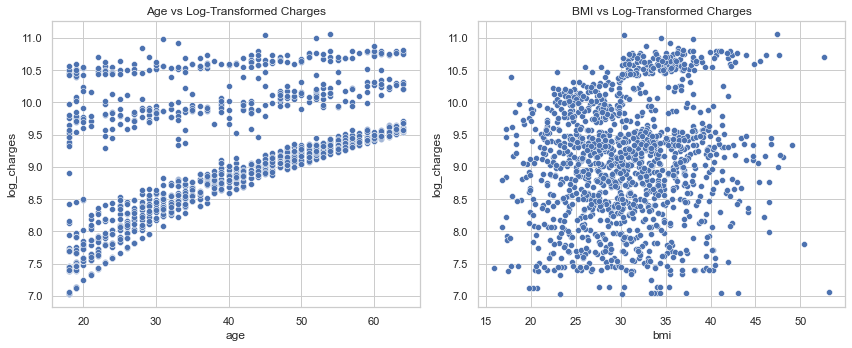

In [14]:
df['log_charges'] = np.log1p(df['charges'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.scatterplot(data=df, x='age', y='log_charges', ax=axes[0])
axes[0].set_title('Age vs Log-Transformed Charges')

sns.scatterplot(data=df, x='bmi', y='log_charges', ax=axes[1])
axes[1].set_title('BMI vs Log-Transformed Charges')

plt.tight_layout()
plt.show()

The relationship between the original age an dBMI and the log-transformed charges are show in the scatter plots above. The Age vs Log-tTransformed charges illustrates how charges tend to increase with age. The log transformation of charges makes the trend clear and reduces the impact of the extreme values. The BMI vs Log-Transformed Charges show the relationship between the BMI and charges. This trend is less distinct compared to age and still indicates that higher BMI is associated with higher medical charges.

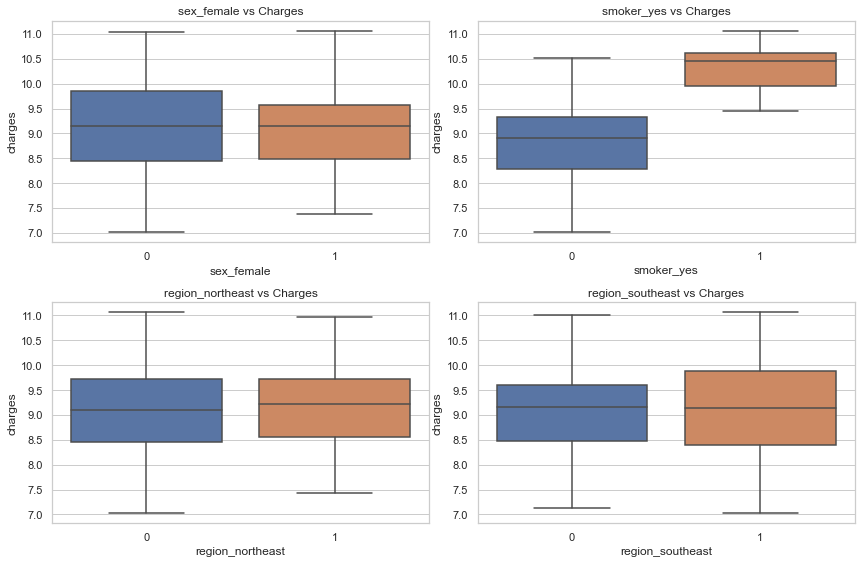

In [15]:
categorical_features = ['sex_female',  'smoker_yes', 'region_northeast', 'region_southeast']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, feature in enumerate(categorical_features):
    sns.boxplot(data=df_encoded, x=feature, y='charges', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{feature} vs Charges')

plt.tight_layout()
plt.show()

The boxplots illustrates a positive trend with older individuals having higher charges and a less distict but still visible positive relationship between BMI and charges.

In [16]:
# Splitting the dataset into training and testing sets
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Building the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predicting charges for the test set
y_pred = linear_model.predict(X_test)

In [19]:
# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mse, r2)

(0.1755091085532074, 0.8047410791393023)

In [20]:
# Retrieving the coefficients of the linear regression model
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
smoker_yes,0.775760
age,0.480867
children,0.092419
bmi,0.082898
region_northeast,0.078739
sex_female,0.037161
region_northwest,0.022337
sex_male,-0.037161
region_southwest,-0.043788
region_southeast,-0.057288


The coefficients of the linear regression model provide insights to the impact of each feature on medical charges. Starting with the most prominent, smoker status. A smoker status of yes (smoker_yes) has a coefficient of 0.76 which is a strong positive effect meaning the mediacl charges increase significantly. The smoker status of no (smoker_no) has a coefficient of -0.76 which is a strong negative effect meaning not being a smoker significantly decreases medical charges. 

The coeffecient of the age variable is 0.48 showing that older individuals will likely have higher medical charges. 

The remaining variables do not show meaningful significance as the coefficients range from -0.06 to 0.09. The direction of the remaining variables is interesting, but again not significant. Children, BMI, northeast region, female, and norhwest region all have a positive coefficient as well as being a smoker and age as previously mentioned. The remaining variables of male, southwest region, and southeast region have a negative direction as well as not smoking.

The main variables influencing the medical charges are the smoking status whether the individual is a smoker or is not a smoker followed by age.

The Ridge and Lasso Regression models could be useful as the Ridge model adds a regularization term to the cost function to constrain the coefficients which is beneficial when there is multicollinearity. The Lasso model is similiar to the Ridge model which the main difference of reducing the coefficients of less significant features to zero. 

In [21]:
# Training Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


In [22]:
# Evaluating Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [23]:
# Training Lasso Regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [24]:
# Evaluating Lasso Regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [25]:
# Retrieving coefficients for comparison
coefficients_ridge = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Ridge Coefficient'])
coefficients_lasso = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Lasso Coefficient'])

(mse_ridge, r2_ridge, mse_lasso, r2_lasso), coefficients_ridge.join(coefficients_lasso).round(5)

((0.1755712690687801,
  0.8046719237815494,
  0.18181948038145437,
  0.7977206093553098),
                   Ridge Coefficient  Lasso Coefficient
 age                         0.48034            0.47215
 bmi                         0.08280            0.06353
 children                    0.09241            0.08677
 sex_female                  0.03696            0.02829
 sex_male                   -0.03696           -0.00000
 smoker_no                  -0.77348           -1.48324
 smoker_yes                  0.77348            0.00000
 region_northeast            0.07844            0.04605
 region_northwest            0.02215            0.00000
 region_southeast           -0.05689           -0.00000
 region_southwest           -0.04370           -0.00000)

The Ridge Regression model produced a mean squared error of 0.18 and an r-squared score of 0.80. The Lasso Regression model produced a mean squared error of 0.18 and an r-squared score of 0.80. Both show similiar performance to the Linear model. 

The Ridge coefficients are similar to the linear regression mode with slight differences due to regularization. The lasso coefficients show greater difference in smoker_yes, sex_male, region_northwest, region_southeast, and region_southwest all reduced to zero showing these variables have little to no impact on the model.

Both the Ridge and Lasso models show similar performance to the linear regression model with slight diffrences in coefficients. The Lasso model highlights the variables the influence the target variable of medical charges